# Task 4.10

# Contents

# 1. Import Libraries & Dataframes
# 2. Consider security implications & PII data
# 3. Regional segmentation of data
# 4. Difference in Spending habits between different regions in the U.S
# 5. Exclusion flag for low-activity customers
# 6. Customer profiling
# 7. Aggregate max, mean, and min variables on a customer-profile level for usage frequency and expenditure
# 8. Customer profiles compared with regions and departments

# 1. Import Libraries & Dataframes

In [5]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Set path
path = r'C:\Users\ascon\Instacart Basket Analysis'

In [7]:
# Import Order_Products_Customer (OPC) dataframes ()
OPC_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_merge.pkl'))

In [8]:
# Check shape of data
OPC_df.shape

(32404859, 37)

In [9]:
OPC_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,region
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196.0,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


# 2. Consider security implications & PII data

# 3. Regional segmentation of data

In [12]:
# Assign Northeast Region
OPC_df.loc[OPC_df['State'] == 'Maine', 'region'] = 'Northeast'
OPC_df.loc[OPC_df['State'] == 'New Hampshire', 'region'] = 'Northeast'
OPC_df.loc[OPC_df['State'] == 'Vermont', 'region'] = 'Northeast'
OPC_df.loc[OPC_df['State'] == 'Pennsylvania', 'region'] = 'Northeast'
OPC_df.loc[OPC_df['State'] == 'Massachusetts', 'region'] = 'Northeast'
OPC_df.loc[OPC_df['State'] == 'Rhode Island', 'region'] = 'Northeast'
OPC_df.loc[OPC_df['State'] == 'Connecticut', 'region'] = 'Northeast'

In [13]:
# Assign Midwest Region
OPC_df.loc[OPC_df['State'] == 'Wisconsin', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'Michigan', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'Illinois', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'Indiana', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'Ohio', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'North Dakota', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'South Dakota', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'Nebraska', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'Kansas', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'Minnesota', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'Iowa', 'region'] = 'Midwest'
OPC_df.loc[OPC_df['State'] == 'Missouri', 'region'] = 'Midwest'

In [14]:
# Assign South Region
OPC_df.loc[OPC_df['State'] == 'Delaware', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Maryland', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'District of Columbia', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Virginia', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'West Virginia', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'North Carolina', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'South Carolina', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Georgia', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Florida', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Kentucky', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Tennessee', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Mississippi', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Alabama', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Oklahoma', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Texas', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Arkansas', 'region'] = 'South'
OPC_df.loc[OPC_df['State'] == 'Louisiana', 'region'] = 'South'

In [15]:
# Assign West Region
OPC_df.loc[OPC_df['State'] == 'Idaho', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Montana', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Wyoming', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Nevada', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Utah', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Colorado', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Arizona', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'New Mexico', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Alaska', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Washington', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Oregon', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'California', 'region'] = 'West'
OPC_df.loc[OPC_df['State'] == 'Hawaii', 'region'] = 'West'

In [16]:
OPC_df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest_day',
       'Busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_product_price', 'spending_flag',
       'median_days_between_orders', 'order_frequency_flag', 'First Name',
       'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Family Status', 'Income', 'region'],
      dtype='object')

# 4. Difference in Spending habits between different regions in the U.S

In [18]:
# Crosstab Region to spending flag
crosstab = pd.crosstab(OPC_df['region'], OPC_df['spending_flag'], dropna = False)

In [19]:
crosstab.to_clipboard()

In [20]:
OPC_df.loc[:,['spending_flag', 'region']].head()

,spending_flag,region
0,Low spender,South
1,Low spender,South
2,Low spender,South
3,Low spender,South
4,Low spender,South


In [21]:
# save changes to orderss_products_customer dataframe
OPC_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cust_merge.pkl'))

# 5. Exclusion flag for low-activity customers

In [23]:
# Create a flag for customers with less than 5 orders
OPC_df.loc[OPC_df['max_order'] < 5, 'activity_flag'] = 'low-activity customer'
OPC_df.loc[OPC_df['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [24]:
# Count the flag
OPC_df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [25]:
# Exclude low-activity customers from the dataframe
df_excluded = OPC_df[OPC_df['activity_flag'] != 'low-activity customer']

In [26]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

# 6. Customer Profiling

### Income group

In [29]:
# Create an income group variable
df_excluded.loc[df_excluded['Income'] <= 55000, 'income_group'] = 'low-income'
df_excluded.loc[(df_excluded['Income'] > 55000) & (df_excluded['Income'] <= 150000), 'income_group'] = 'middle-income'
df_excluded.loc[df_excluded['Income'] > 150000, 'income_group'] = 'high-income'

C:\Users\ascon\AppData\Local\Temp\ipykernel_14068\3898160148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['Income'] <= 55000, 'income_group'] = 'low-income'


In [30]:
# Check the counts of income groups
df_excluded['income_group'].value_counts(dropna = False)

income_group
middle-income    22617642
low-income        4452388
high-income       3894534
Name: count, dtype: int64

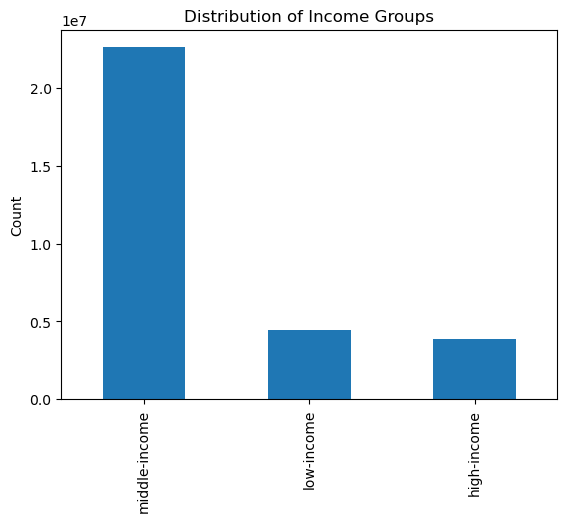

In [31]:
# Create a bar chart showing the distribution of income groups
income_group_counts = df_excluded['income_group'].value_counts(dropna=False)
income_group_distribution_bar = income_group_counts.plot.bar()  
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [32]:
# Export the bar chart
income_group_distribution_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution_bar.png'))

### Age

In [34]:
# Create an age group variable
df_excluded.loc[df_excluded['Age'] <= 25, 'age_group'] = 'young adult'
df_excluded.loc[(df_excluded['Age'] > 25) & (df_excluded['Age'] <= 44), 'age_group'] = 'adult'
df_excluded.loc[(df_excluded['Age'] > 44) & (df_excluded['Age'] <= 64), 'age_group'] = 'middle-aged'
df_excluded.loc[df_excluded['Age'] > 64, 'age_group'] = 'senior'

C:\Users\ascon\AppData\Local\Temp\ipykernel_14068\962319223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['Age'] <= 25, 'age_group'] = 'young adult'


In [35]:
# Check value counts for each age group
age_group_counts = df_excluded['age_group'].value_counts(dropna = False)
age_group_counts

age_group
middle-aged    9690051
adult          9214451
senior         8195544
young adult    3864518
Name: count, dtype: int64

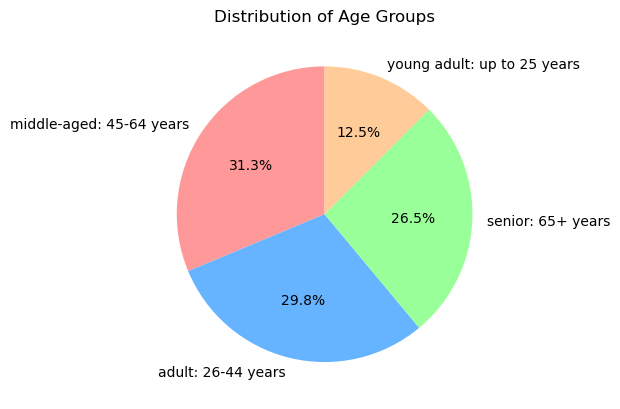

In [36]:
# Create pie chart showing the distribution of age groups
age_group_distribution_pie = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['middle-aged: 45-64 years', 'adult: 26-44 years', 'senior: 65+ years', 'young adult: up to 25 years'], startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [37]:
# Export chart
age_group_distribution_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_distribution_pie.png'))

### Dependents

In [39]:
# Create a dependents flag
df_excluded.loc[df_excluded['Number of Dependents'] == 0, 'dependants_flag'] = 'no dependants'
df_excluded.loc[df_excluded['Number of Dependents'] >= 1, 'dependants_flag'] = 'has dependants'

C:\Users\ascon\AppData\Local\Temp\ipykernel_14068\967163808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded.loc[df_excluded['Number of Dependents'] == 0, 'dependants_flag'] = 'no dependants'


In [40]:
# Check value counts
dependant_counts = df_excluded['dependants_flag'].value_counts(dropna = False)
dependant_counts

dependants_flag
has dependants    23224883
no dependants      7739681
Name: count, dtype: int64

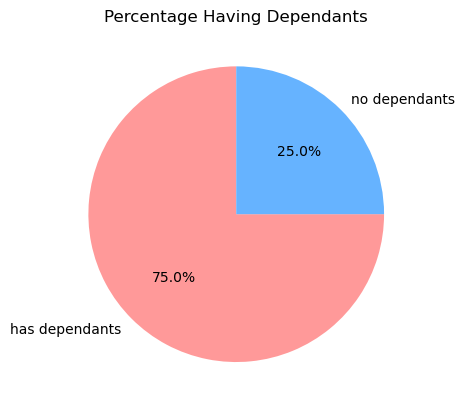

In [41]:
# Create a pie chart showing the percentage of dependants
dependants_pie = dependant_counts.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('Percentage Having Dependants')
plt.show()

In [42]:
# Export the new dataframe
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_excluded.pkl'))

In [43]:
list(df_excluded.columns.values)

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 '_merge',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'match',
 'price_range_loc',
 'busiest_day',
 'Busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'avg_product_price',
 'spending_flag',
 'median_days_between_orders',
 'order_frequency_flag',
 'First Name',
 'Last Name',
 'Gender',
 'State',
 'Age',
 'Date Joined',
 'Number of Dependents',
 'Family Status',
 'Income',
 'region',
 'activity_flag',
 'income_group',
 'age_group',
 'dependants_flag']

In [44]:
df_excluded.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Age,Date Joined,Number of Dependents,Family Status,Income,region,activity_flag,income_group,age_group,dependants_flag
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants
1,2398795,1,prior,2,3,7,15.0,196.0,1.0,1.0,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants
2,473747,1,prior,3,3,12,21.0,196.0,1.0,1.0,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants
3,2254736,1,prior,4,4,7,29.0,196.0,1.0,1.0,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants
4,431534,1,prior,5,4,15,28.0,196.0,1.0,1.0,...,31,2/17/2019,3,married,40423,South,high-activity customer,low-income,adult,has dependants


### Loyalty VS Age Group

In [46]:
# Crosstab loyalty with age group
loyalty_age_cross = pd.crosstab(df_excluded['loyalty_flag'], df_excluded['age_group'], dropna = False)
loyalty_age_cross

age_group,adult,middle-aged,senior,young adult
loyalty_flag,,,,
Loyal customer,3048175,3231509,2723958,1280451
New customer,1420508,1506670,1276659,599858
Regular customer,4745768,4951872,4194927,1984209


(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

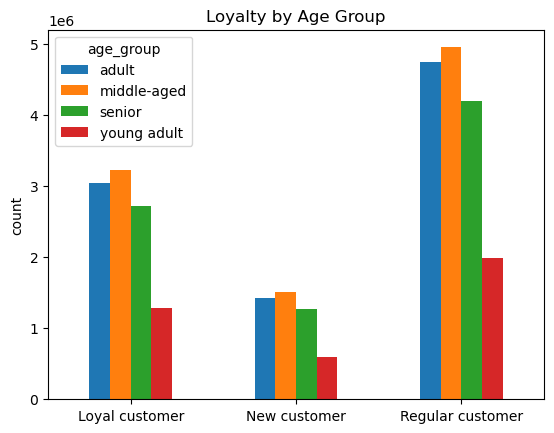

In [47]:
# bar chart
loyalty_age_bar = loyalty_age_cross.plot.bar()
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [48]:
# Export the chart
loyalty_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_age_group_bar.png'))

### Spending VS Age Group

In [50]:
# Crosstab spending with age group
spending_age_cross = pd.crosstab(df_excluded['spending_flag'], df_excluded['age_group'], dropna = False)
spending_age_cross

age_group,adult,middle-aged,senior,young adult
spending_flag,,,,
High spender,174740,197797,156886,74002
Low spender,9039711,9492254,8038658,3790516


(array([0, 1]), [Text(0, 0, 'High spender'), Text(1, 0, 'Low spender')])

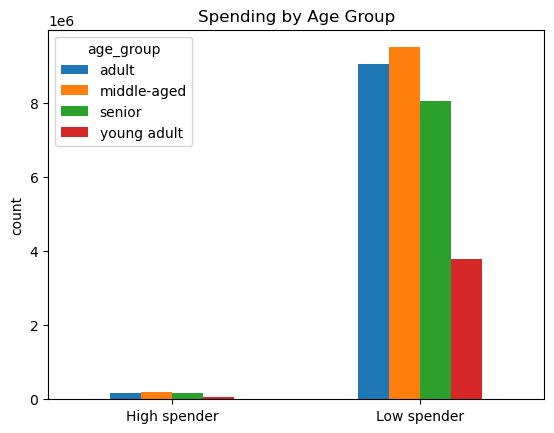

In [51]:
# bar chart
spending_age_bar = spending_age_cross.plot.bar()
plt.title('Spending by Age Group')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [52]:
# Export the chart
spending_age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_age_group_bar.png'))

### Regional spending with low activity customers excluded

In [54]:
df_excluded.loc[df_excluded['State'] == 'Pennsylvania', 'region'] = 'Northeast'

In [55]:
# Crosstab Region to spending flag
region_spending_cross = pd.crosstab(df_excluded['region'], df_excluded['spending_flag'], dropna = False)

In [56]:
region_spending_cross

spending_flag,High spender,Low spender
region,,
Midwest,148678,7112835
Northeast,83777,4176110
South,199339,10111800
West,152288,7774939
NaN,19343,1185455


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West'),
  Text(4, 0, 'nan')])

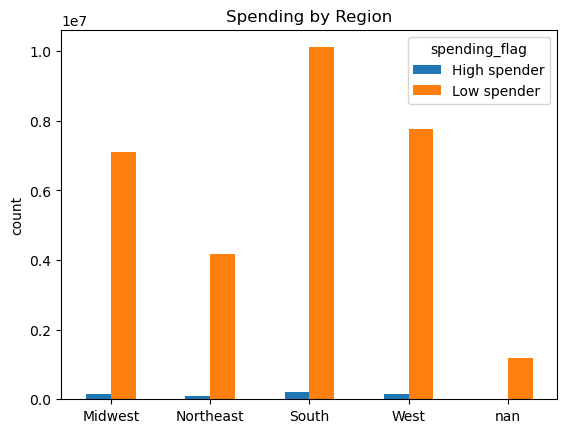

In [57]:
# bar chart
region_spending_bar = region_spending_cross.plot.bar()
plt.title('Spending by Region')
plt.xlabel('')
plt.ylabel('count')
plt.xticks(rotation=0)

In [58]:
# Export the chart
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending_bar.png'))

### Orders by Department

In [60]:
# Import departments dataframe
dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [61]:
dept.rename(columns={'department': 'department_id'}, inplace=True)

In [62]:
dept

,Unnamed: 0,department_id
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [63]:
df_excluded['department_id'] = df_excluded['department_id'].astype(str)
dept['department_id'] = dept['department_id'].astype(str)

C:\Users\ascon\AppData\Local\Temp\ipykernel_14068\1323681355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded['department_id'] = df_excluded['department_id'].astype(str)


In [64]:
df_excluded = df_excluded[['department_id', 'loyalty_flag','spending_flag','order_frequency_flag','State', 'Age','Number of Dependents', 'Family Status', 'Income', 'region','activity_flag', 'income_group', 'age_group', 'dependants_flag', 'user_id', 'order_dow', 'Gender','order_hour_of_day', 'prices','order_number','days_since_prior_order']]

In [65]:
print("Columns in df_excluded:", df_excluded.columns)

Columns in df_excluded: Index(['department_id', 'loyalty_flag', 'spending_flag',
       'order_frequency_flag', 'State', 'Age', 'Number of Dependents',
       'Family Status', 'Income', 'region', 'activity_flag', 'income_group',
       'age_group', 'dependants_flag', 'user_id', 'order_dow', 'Gender',
       'order_hour_of_day', 'prices', 'order_number',
       'days_since_prior_order'],
      dtype='object')


In [66]:
dept = dept[['department_id']]

In [67]:
df_final_merged = df_excluded

In [68]:
# Exporting new dataframe with department merged 
df_final_merged.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_departments.pkl'))

In [69]:
df_final_merged.head()

,department_id,loyalty_flag,spending_flag,order_frequency_flag,State,Age,Number of Dependents,Family Status,Income,region,...,income_group,age_group,dependants_flag,user_id,order_dow,Gender,order_hour_of_day,prices,order_number,days_since_prior_order
0,7,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,...,low-income,adult,has dependants,1,2,Female,8,9.0,1,NaN
1,7,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,...,low-income,adult,has dependants,1,3,Female,7,9.0,2,15.0
2,7,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,...,low-income,adult,has dependants,1,3,Female,12,9.0,3,21.0
3,7,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,...,low-income,adult,has dependants,1,4,Female,7,9.0,4,29.0
4,7,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,...,low-income,adult,has dependants,1,4,Female,15,9.0,5,28.0


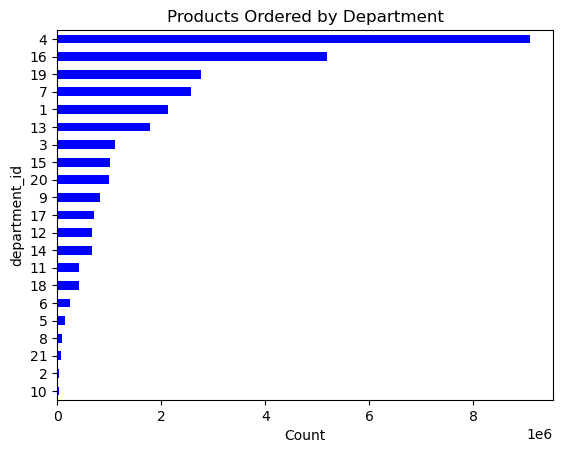

In [70]:
# bar chart frequency of orders vs department
depts_bar = df_final_merged['department_id'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Products Ordered by Department')

In [71]:
# Export bar chart
depts_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'depts_bar.png'))

### Age VS Department

In [73]:
# crosstab age group vs department
age_dept_cross = pd.crosstab(df_final_merged['age_group'], df_final_merged['department_id'], dropna = False)
age_dept_cross

department_id,1,10,11,12,13,14,15,16,17,18,...,2,20,21,3,4,5,6,7,8,9
age_group,,,,,,,,,,,,,,,,,,,,,
adult,624442,9902,125522,199124,529307,198803,302479,1549127,207553,123044,...,10198,299970,19130,334154,2712590,42167,76675,754851,27034,243702
middle-aged,667149,10298,134736,209927,558929,211274,315774,1612490,218860,129910,...,10811,314110,20340,350804,2830853,46579,79743,814687,28293,256920
senior,564250,8945,111052,181150,472383,175296,267509,1368072,186630,106204,...,8946,265199,16915,295997,2408104,36693,67199,684020,25115,217316
young adult,265890,4306,52996,84580,222086,85477,126312,647493,86814,51234,...,4456,124555,8383,139873,1127726,19188,32374,318343,12618,104198


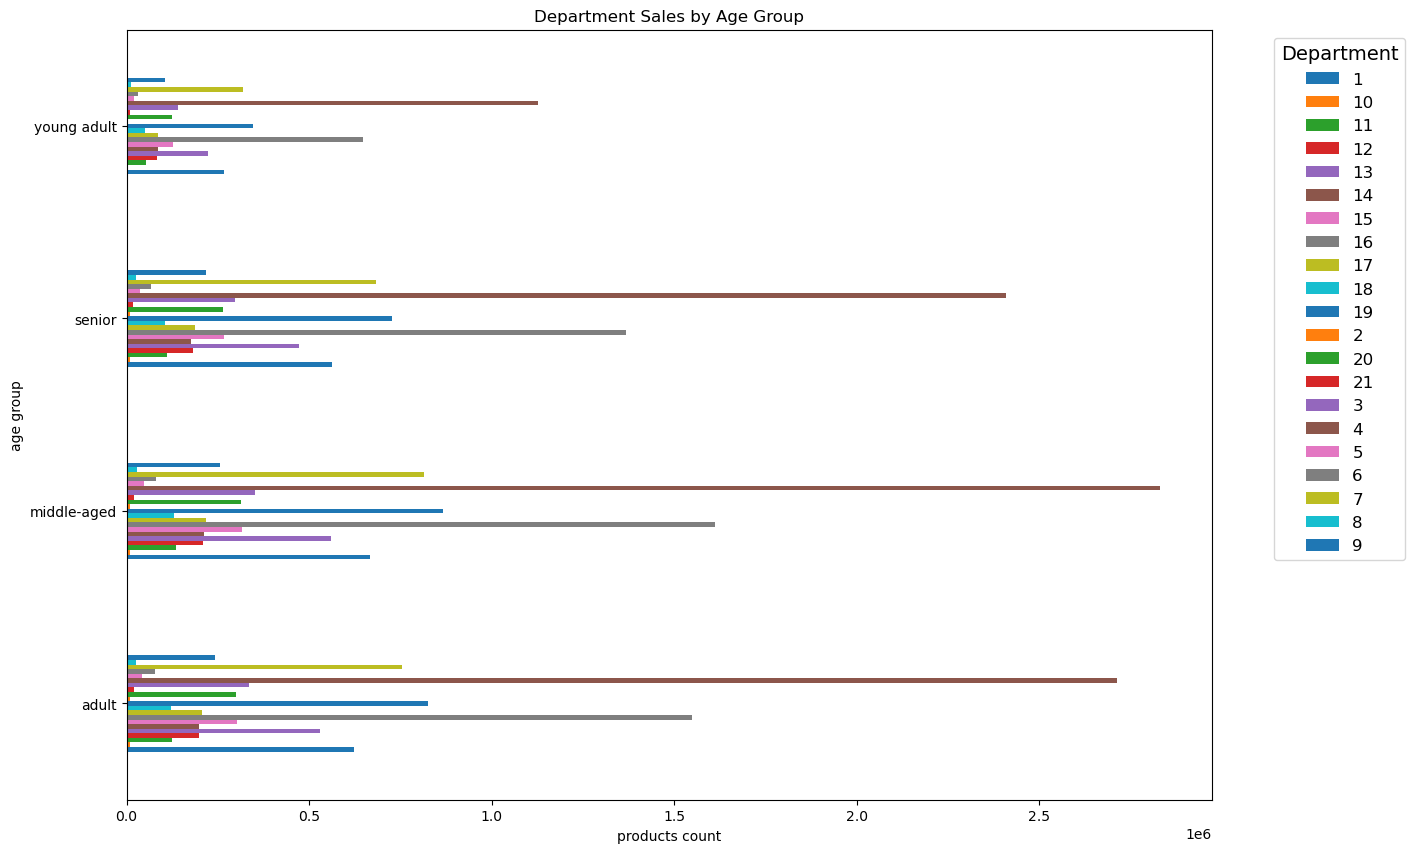

In [74]:
# bar chart
age_dept_bar = age_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Age Group')
plt.xlabel('products count')
plt.ylabel('age group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [75]:
# Export bar chart
age_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_depts_bar.png'))

# Income VS Department

In [77]:
# crosstab income group vs department
income_dept_cross = pd.crosstab(df_final_merged['income_group'], df_final_merged['department_id'], dropna = False)
income_dept_cross

department_id,1,10,11,12,13,14,15,16,17,18,...,2,20,21,3,4,5,6,7,8,9
income_group,,,,,,,,,,,,,,,,,,,,,
high-income,276341,3671,53530,91514,231915,83418,132389,659149,92674,53001,...,4554,125886,8253,148430,1134490,24067,32822,313325,12991,106335
low-income,287968,5974,62888,54717,226221,116540,112945,680816,111508,43438,...,4958,141758,8902,144086,1139552,22199,30240,479742,11782,92401
middle-income,1557422,23806,307888,528550,1324569,470892,766740,3837217,495675,313953,...,24899,736190,47613,828312,6805231,98361,192929,1778834,68287,623400


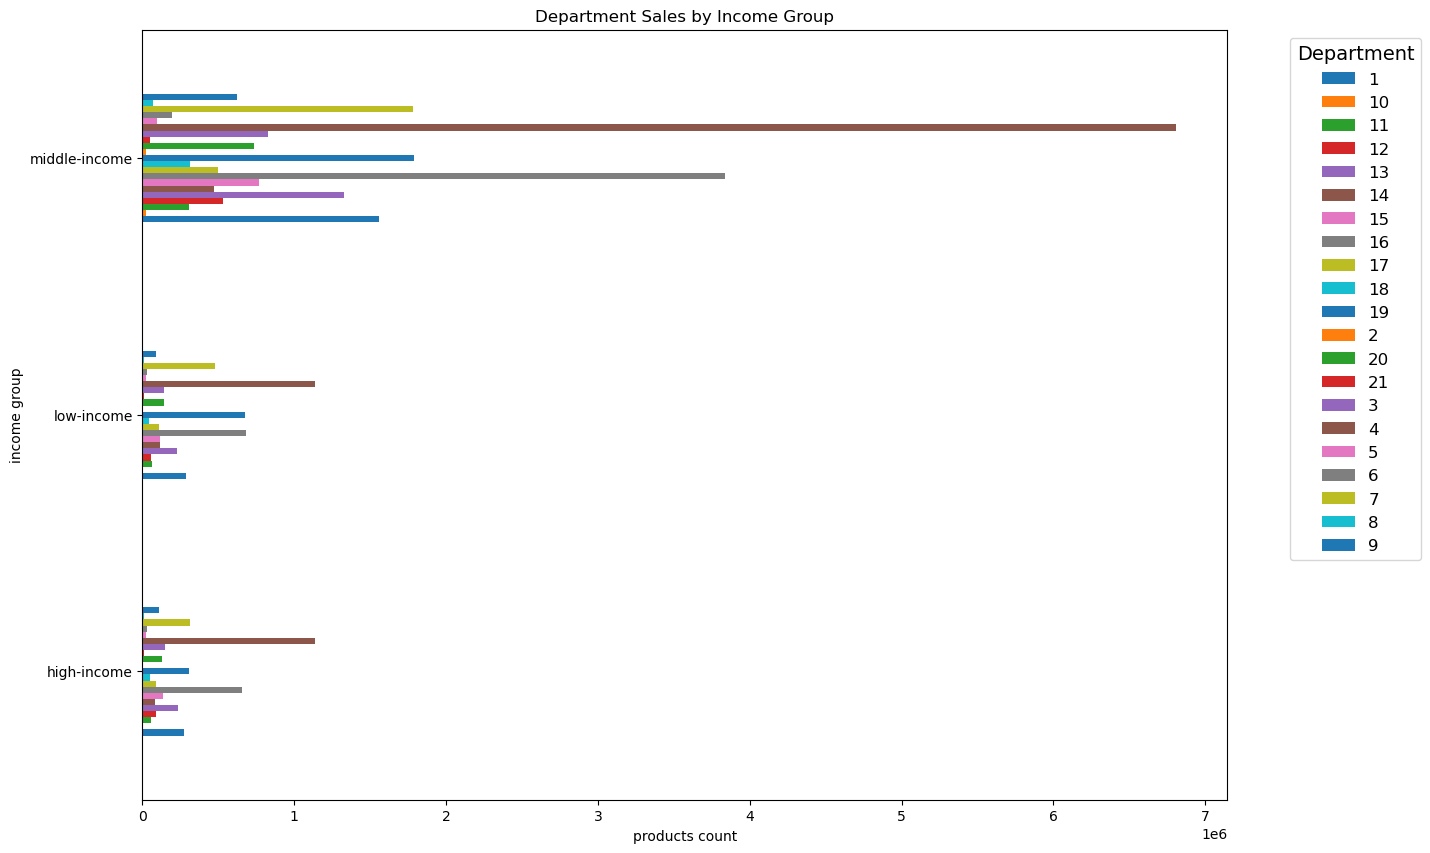

In [78]:
# bar chart
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [79]:
# Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_depts_bar.png'))

# 7. Aggregate max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [81]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_final_merged.groupby(['user_id', 'Gender', 'State', 'region', 'Number of Dependents', 'Family Status', 'age_group', 'order_dow', 'loyalty_flag', 'dependants_flag', 'income_group', 'spending_flag', 'order_number'])['prices'].sum().reset_index()

In [82]:
customer_profile.head()

,user_id,Gender,State,region,Number of Dependents,Family Status,age_group,order_dow,loyalty_flag,dependants_flag,income_group,spending_flag,order_number,prices
0,1,Female,Alabama,South,3,married,adult,1,New customer,has dependants,low-income,Low spender,7,29.0
1,1,Female,Alabama,South,3,married,adult,1,New customer,has dependants,low-income,Low spender,8,40.2
2,1,Female,Alabama,South,3,married,adult,1,New customer,has dependants,low-income,Low spender,9,40.2
3,1,Female,Alabama,South,3,married,adult,2,New customer,has dependants,low-income,Low spender,1,31.6
4,1,Female,Alabama,South,3,married,adult,2,New customer,has dependants,low-income,Low spender,6,25.0


In [83]:
# Aggregate variables for customer profiles for expenditure
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [84]:
customer_agg

order_number           prices                   
                 max min  mean    max    min        mean
user_id                                                 
1                 10   1   5.5   63.1   25.0   37.570000
2                 14   1   7.5  213.1   19.0  104.685714
3                 12   1   6.5  107.2   30.7   60.116667
4                  5   1   3.0   63.4   10.8   29.540000
7                 20   1  10.5  166.7    6.3   76.910000
...              ...  ..   ...    ...    ...         ...
206203             5   1   3.0  216.3  126.6  169.900000
206206            67   1  34.0  157.3    9.6   32.526866
206207            16   1   8.5  200.8   42.8  101.931250
206208            49   1  25.0  238.5   38.7  115.595918
206209            13   1   7.0  131.5   11.1   70.046154

[156301 rows x 6 columns]

In [85]:
# Aggregate variables for customer profiles for usage frequency
freq_agg = df_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [86]:
freq_agg

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
2                 14   1   8.035897                   30.0   3.0  15.967033
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
7                 20   1   9.645631                   30.0   2.0  13.546392
...              ...  ..        ...                    ...   ...        ...
206203             5   1   2.983193                   30.0  27.0  29.103093
206206            67   1  38.007018                   15.0   0.0   4.042705
206207            16   1   8.116592                   30.0   1.0  14.879397
206208            49   1  25.505170                   20.0   0.0   7.442105
206209            13   1   6.937984                   30.0   3.0  20.275862

[162631 rows x 6 columns]

# 8. Customer profiles compared with regions and departments

### Region VS Department

In [89]:
# crosstab age group vs department
region_dept_cross = pd.crosstab(df_final_merged['region'], df_final_merged['department_id'], dropna = False)
region_dept_cross

department_id,1,10,11,12,13,14,15,16,17,18,...,2,20,21,3,4,5,6,7,8,9
region,,,,,,,,,,,,,,,,,,,,,
Midwest,498225,7929,100398,158260,420334,156155,237459,1212490,166992,95741,...,7983,234464,15563,261753,2134115,34043,60666,598979,21358,193463
Northeast,286464,4471,58664,91595,244582,92420,137738,711976,96810,56872,...,4926,139808,8970,155882,1239418,20120,35265,364615,13150,111939
South,709906,11180,142496,224120,591754,223172,337458,1723016,230061,139511,...,11579,333620,21787,371620,3027476,48813,84649,859419,29909,272813
West,543164,8743,106647,173830,457886,173619,260221,1327060,178200,102428,...,8581,257352,15906,288155,2324678,36754,65998,650574,24059,212043
NaN,83972,1128,16101,26976,68149,25484,39198,202640,27794,15840,...,1342,38590,2542,43418,353586,4897,9413,98314,4584,31878


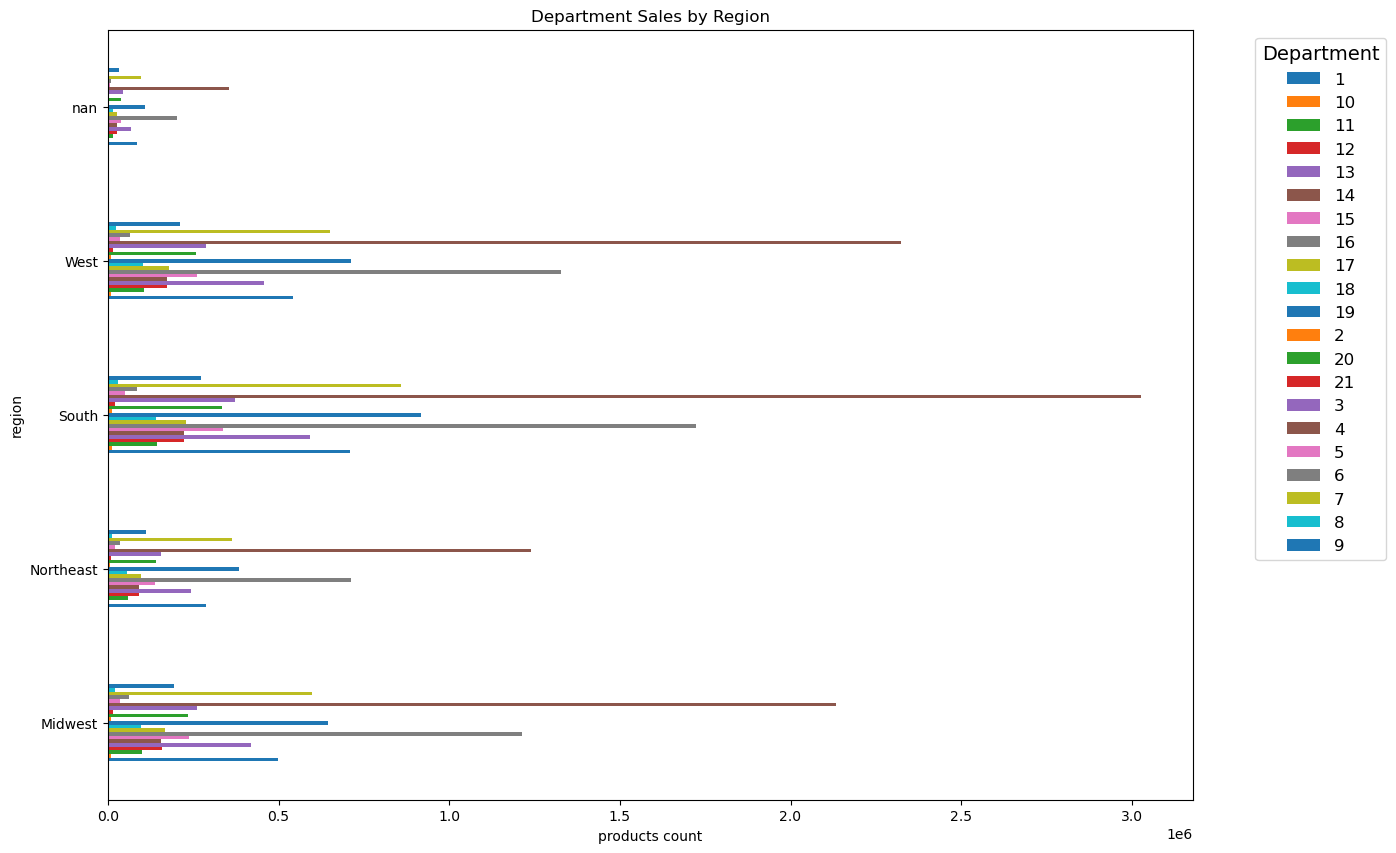

In [90]:
# bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10))
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [93]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_depts_bar.png'))